In [2]:
import os
import cobra
import scripts.io
import scripts.gen_model
import scripts.reaction_utils
import scripts.metabolite_utils
import math
import numpy as np
import importlib
import thermo_flux.io.load_sbml


from thermo_flux.tools.drg_tools import reaction_balance

/home/laurens/miniconda3/envs/thermo_pta/lib/python3.11/site-packages/enkie/compartment_parameters.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [3]:
INPUT_MODEL = "datafiles/model.xlsx"
INPUT_KEGGS = "datafiles/ecoli_kegg_id.csv"
INPUT_REED = "regression/reed.csv"
INPUT_INCHI = "regression/InChIs.csv"
INPUT_GAMS = "regression/model_Ecoli_from-gams.xlsx"
INPUT_EXP_DATA = "regression/allPhysioData_formatted_forGSM_20230831.csv"
INPUT_EXP_CONC = "regression/allConcRange_20230912.csv"
INPUT_METABOLOMICS = "regression/metabolomics-Kochanowski_20230925.csv"

MODEL_NAME = "ecoli"

CONDITIONS_TO_REGRESS = ["WT-Glc_I"]

INCLUDE_CO2 = True
INCLUDE_O2 = True
ALLOW_OTHER_EXCRETION = False
RELAX_EXP_FLUX_BOUNDS = 2.0

In [116]:
tmodel = scripts.gen_model.gen_model(MODEL_NAME, INPUT_MODEL, INPUT_KEGGS, INPUT_REED, INPUT_INCHI, INPUT_GAMS, "", True, True)
tmodel = scripts.gen_model.apply_physio_data(tmodel, CONDITIONS_TO_REGRESS[0], INPUT_EXP_DATA, INPUT_EXP_CONC, INPUT_METABOLOMICS, INPUT_GAMS, RELAX_EXP_FLUX_BOUNDS, INCLUDE_CO2, INCLUDE_O2, allow_other_excr=False, output_log="")

blocked_p = scripts.reaction_utils.list_blocked_reactions(tmodel, "core", "", 1, False)
print(len(blocked_p))

tmodel.remove_reactions(blocked_p, remove_orphans=True)
scripts.metabolite_utils.remove_orphan_metabolites(tmodel)
for rxn in tmodel.reactions:
    reaction_balance(rxn, balance_charge=True, balance_mg=False)
tmodel.update_thermo_info(fit_unknown_dfG0=True)

['Parameters', 'Exchange reactions', 'Reactions', 'Biomass Composition', 'Transmembrane reactions', 'Metabolites', 'references', 'Transmembrane_reactions_reed', 'Transmembrane reactions_Orth', 'Transmembrane reactions old', 'Sheet3', 'log', 'subsystems']
*** Reading data from Reactions ***
unknown metabolite '2dhglcn[c]' created
unknown metabolite 'nadh[c]' created
unknown metabolite 'glcn[c]' created
unknown metabolite 'nad[c]' created
unknown metabolite 'nadph[c]' created
unknown metabolite 'nadp[c]' created
unknown metabolite '2dhguln[c]' created
unknown metabolite 'idon-L[c]' created
unknown metabolite '3hcinnm[c]' created
unknown metabolite 'o2[c]' created
unknown metabolite 'dhcinnm[c]' created
unknown metabolite 'h2o[c]' created
unknown metabolite '3hpppn[c]' created
unknown metabolite 'dhpppn[c]' created
unknown metabolite 'phthr[c]' created
unknown metabolite '4hthr[c]' created
unknown metabolite 'pi[c]' created
unknown metabolite '5dglcn[c]' created
unknown metabolite 'ru5p-D

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


*** Updating metabolite information ***
2dhglcn_c NOTHING DONE!
nadh_c NOTHING DONE!
glcn_c NOTHING DONE!
nad_c NOTHING DONE!
nadph_c NOTHING DONE!
nadp_c NOTHING DONE!
2dhguln_c NOTHING DONE!
idon-L_c NOTHING DONE!
3hcinnm_c NOTHING DONE!
o2_c NOTHING DONE!
dhcinnm_c NOTHING DONE!
h2o_c NOTHING DONE!
3hpppn_c NOTHING DONE!
dhpppn_c NOTHING DONE!
phthr_c NOTHING DONE!
4hthr_c NOTHING DONE!
pi_c NOTHING DONE!
5dglcn_c NOTHING DONE!
ru5p-D_c NOTHING DONE!
ara5p_c NOTHING DONE!
ACP_c NOTHING DONE!
atp_c NOTHING DONE!
ttdca_c NOTHING DONE!
amp_c NOTHING DONE!
myrsACP_c NOTHING DONE!
ppi_c NOTHING DONE!
ttdcea_c NOTHING DONE!
tdeACP_c NOTHING DONE!
hdca_c NOTHING DONE!
palmACP_c NOTHING DONE!
hdcea_c NOTHING DONE!
hdeACP_c NOTHING DONE!
ocdcea_c NOTHING DONE!
octeACP_c NOTHING DONE!
dtdp4aaddg_c NOTHING DONE!
unagamu_c NOTHING DONE!
dtdp_c NOTHING DONE!
unagamuf_c NOTHING DONE!
arbt6p_c NOTHING DONE!
g6p_c NOTHING DONE!
hqn_c NOTHING DONE!
4abut_c NOTHING DONE!
akg_c NOTHING DONE!
glu-L_c N

In [117]:
tmodel.m = None
tmodel.objective = tmodel.reactions.biomass_EX
tmodel.add_TFBA_variables()
tmodel.m.Params.TimeLimit = 500
tmodel.m.optimize()

Set parameter NonConvex to value 2
Set parameter TimeLimit to value 10
Set parameter TimeLimit to value 500
Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (linux64 - "Ubuntu 24.04.2 LTS")

CPU model: AMD Ryzen 7 7800X3D 8-Core Processor, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Non-default parameters:
TimeLimit  500
NonConvex  2
GURO_PAR_DUMP  1

Academic license 2731723 - for non-commercial use only - registered to l.___@student.rug.nl
Optimize a model with 6431 rows, 5117 columns and 155011 nonzeros
Model fingerprint: 0x22fd5abb
Model has 1 simple general constraint
  1 NORM
Variable types: 4494 continuous, 623 integer (623 binary)
Coefficient statistics:
  Matrix range     [3e-06, 7e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [3e-01, 1e+06]
  RHS range        [2e-14, 1e+05]
Presolve removed 3145 rows and 2492 columns
Presolve time: 0.36s
Presolved: 3287 rows, 2925 columns, 136751 nonzeros
Pr

In [4]:
blocked_p = scripts.reaction_utils.list_blocked_reactions(tmodel, "core", "", 1, False)
print(len(blocked_p))

tmodel.remove_reactions(blocked_p, remove_orphans=True)
scripts.metabolite_utils.remove_orphan_metabolites(tmodel)
for rxn in tmodel.reactions:
    reaction_balance(rxn, balance_charge=True, balance_mg=False)
tmodel.update_thermo_info(fit_unknown_dfG0=True)

['3HCINNMH', '3HPPPNH', '4HTHRS', '5DGLCNR', 'AADDGT', 'AB6PGH', 'ACACCT', 'ACACT1r', 'ACBIPGT', 'ACGAMT', 'ACMAMUT', 'ACNML', 'ACONMT', 'ACPS1', 'ADHEr', 'ADK4', 'ADNCYC', 'ADOCBIK', 'ADOCBLS', 'AGDC', 'AGMT', 'AHC', 'AHCYSNS', 'ALCD19', 'ALDD19x', 'ALLTAH', 'alltn', 'ALTRH', 'AMANAPE', 'AMANK', 'AMAOTr', 'AMMQT82', 'AMPMS', 'AOXSr', 'AP4AH', 'AP5AH', 'ARAI', 'ARGDC', 'BTS2', 'BUTCT', 'CBIAT', 'CBLAT', 'CDPMEK', 'CHRPL', 'CINNDO', 'CPPPGO', 'CRNBTCT', 'CRNCBCT', 'CRNCDH', 'CYANST', 'CYNTAH', 'DBTSr', 'DDGALK', 'DDGLK', 'DDPGALA', 'DHBD', 'DHBSr', 'DHCIND', 'DHCINDO', 'DHNAOT', 'DHPPD', 'DHPTDC', 'DMATT', 'DMQMT', 'DOGULNR', 'DXPRIi', 'DXPS', 'DXYLK', 'E4PD', 'ECAPEC', 'EDTXS3', 'EDTXS4', 'ENTCS', 'FAO3', 'FAO4', 'FCI', 'FCLK', 'FCLPA', 'FCLT', 'FFSD', 'FHL', 'G1PTT', 'G1SATi', 'GALCTD', 'GALCTND', 'GALKr', 'GALS3', 'GDMANE', 'GLCRAL', 'GLCRD', 'GLTPD', 'glucys', 'GLUTRR', 'GLUTRS', 'GMAND', 'GOFUCR', 'GP4GH', 'GPDDA1', 'GPDDA3', 'GPDDA5', 'GRTT', 'GTHOr', 'GTHS', 'GUI1', 'GUI2', 'HBZO

In [34]:
for m in tmodel.metabolites:
    if m.formula and "-" in m.formula:
        print(f"{m.id}, {m.formula}")
        m.formula = None

In [16]:
for m in tmodel.metabolites:
    if m.compartment == "e":
        print(m.id)

h2o_e
nad_e
amp_e
nmn_e
tre_e
glc-D_e
12ppd-S_e
15dap_e
26dap-M_e
2ddglcn_e
3hcinnm_e
3hpppn_e
4abut_e
ac_e
acac_e
acald_e
acgam_e
acmana_e
acnam_e
ade_e
adn_e
akg_e
ala-D_e
ala-L_e
alltn_e
arab-L_e
arg-L_e
asn-L_e
asp-L_e
but_e
charge_e
cbl1_e
chol_e
cit_e
co2tot_e
crn_e
csn_e
cynt_e
cys-L_e
cytd_e
dad-2_e
dcyt_e
dgsn_e
dha_e
din_e
dms_e
dmso_e
duri_e
etoh_e
fe2_e
for_e
fru_e
fuc1p-L_e
fuc-L_e
fum_e
g6p_e
gal_e
galct-D_e
galctn-D_e
galt_e
galur_e
gam_e
gbbtn_e
glcn_e
glcr_e
glcur_e
gln-L_e
glu-L_e
gly_e
glyald_e
glyb_e
glyc_e
glyc3p_e
glyclt_e
gsn_e
gua_e
h_e
hdca_e
his-L_e
hxan_e
idon-L_e
ile-L_e
indole_e
ins_e
k_e
lac-D_e
lac-L_e
lcts_e
leu-L_e
lys-L_e
mal-L_e
malt_e
malthx_e
maltpt_e
malttr_e
maltttr_e
man_e
man6p_e
melib_e
met-D_e
met-L_e
mnl_e
na1_e
nac_e
nh3_e
no2_e
no3_e
o2_e
ocdca_e
orn_e
phe-L_e
pi_e
pnto-R_e
pppn_e
pro-L_e
ptrc_e
pyr_e
rib-D_e
rmn_e
sbt-D_e
ser-D_e
ser-L_e
so4_e
spmd_e
succ_e
sucr_e
tartr-L_e
taur_e
thm_e
thr-L_e
thymd_e
tma_e
tmao_e
trp-L_e
tsul_e
ttdca_e
t

In [17]:
print(tmodel.boundary)

[<ThermoReaction EX_12ppd-S at 0x7352b5d62310>, <ThermoReaction EX_15dap at 0x7352b5d1e9d0>, <ThermoReaction EX_26dap-M at 0x7352b7377210>, <ThermoReaction EX_2ddglcn at 0x7352b5d1d990>, <ThermoReaction EX_3hcinnm at 0x7352b5d1fbd0>, <ThermoReaction EX_3hpppn at 0x7352b7377910>, <ThermoReaction EX_4abut at 0x7352b5cfcf90>, <ThermoReaction EX_ac at 0x7352b5cedad0>, <ThermoReaction EX_acac at 0x7352b5cef090>, <ThermoReaction EX_acald at 0x7352b5ceff50>, <ThermoReaction EX_acgam at 0x7352b5ceea90>, <ThermoReaction EX_acmana at 0x7352b5d5ca10>, <ThermoReaction EX_acnam at 0x7352b5cec8d0>, <ThermoReaction EX_ade at 0x7352b5cef410>, <ThermoReaction EX_adn at 0x7352b446d410>, <ThermoReaction EX_akg at 0x7352b446fe50>, <ThermoReaction EX_ala-D at 0x7352b446f8d0>, <ThermoReaction EX_ala-L at 0x7352b446f9d0>, <ThermoReaction EX_alltn at 0x7352b446e710>, <ThermoReaction EX_amp at 0x7352b446f310>, <ThermoReaction EX_arab-L at 0x7352b446c190>, <ThermoReaction EX_arg-L at 0x7352b446e690>, <ThermoRea

In [35]:
for r in tmodel.reactions:
    lb = r.lower_bound
    if not isinstance(lb, (int, float)) or isinstance(lb, np.generic) or math.isnan(lb):
        print(r.id, lb, type(lb))

EX_ac 8.826068397839 <class 'numpy.float64'>
EX_co2 11.965751045987265 <class 'numpy.float64'>
EX_glc -12.148855548767477 <class 'numpy.float64'>
EX_o2 -25.64184695305984 <class 'numpy.float64'>
biomass_EX 0.670839382285755 <class 'numpy.float64'>
EX_oro 0.261884198060484 <class 'numpy.float64'>


In [36]:
for r in tmodel.reactions:
    r.lower_bound = float(r.lower_bound)
    r.upper_bound = float(r.upper_bound)

In [42]:
for rxn in tmodel.reactions:
    if rxn.id.startswith("EX_"):
        print(
            rxn.id,
            [(m.id, rxn.get_coefficient(m)) for m in rxn.metabolites]
        )

EX_ac [('ac_e', -1)]
EX_co2 [('co2tot_e', -1)]
EX_glc [('glc-D_e', -1)]
EX_h [('h_e', -1)]
EX_h2o [('h2o_e', -1)]
EX_nh3 [('nh3_e', -1)]
EX_o2 [('o2_e', -1)]
EX_pi [('pi_e', -1)]
EX_so4 [('so4_e', -1)]
EX_oro [('orot_e', -1)]


In [38]:
fva = cobra.flux_analysis.flux_variability_analysis(tmodel, reaction_list=[x.id for x in tmodel.reactions], fraction_of_optimum=0.0, processes=1)

In [39]:
print(fva)

               minimum     maximum
2DGLCNRx   -100.000000  100.000000
2DGLCNRy   -100.000000  100.000000
2DGULRx    -100.000000  100.000000
2DGULRy    -100.000000  100.000000
A5PISO        0.028175    0.029479
...                ...         ...
biomass_ce    0.670839    0.701880
biomass_EX    0.670839    0.701880
OROTex      -99.738116  100.000000
DCTA        -99.738116  100.000000
EX_oro        0.261884    0.355406

[623 rows x 2 columns]


In [37]:
cobra_core = cobra.io.load_model('e_coli_core')
cobra.io.write_sbml_model(cobra_core, f"reduction/Ecoli_Core.xml")

In [20]:
cobra_json = scripts.io.export_tmodel_cobra(tmodel, f"reduction/Ecoli_WT_Glc.json")
cobra_json_model = scripts.io.load_tmodel_cobra(f"reduction/Ecoli_WT_Glc.json", False)
cobra_json_final = cobra.io.write_sbml_model(tmodel, f"reduction/Ecoli_WT_Glc_fromJson.xml")

[{'id': '2dhglcn_c', 'name': '2dhglcn_c', 'compartment': 'c', 'charge': -1, 'formula': 'H8'}, {'id': 'nadh_c', 'name': 'nadh_c', 'compartment': 'c', 'charge': -2, 'formula': 'H27'}, {'id': 'glcn_c', 'name': 'glcn_c', 'compartment': 'c', 'charge': -1, 'formula': 'H11'}, {'id': 'nad_c', 'name': 'nad_c', 'compartment': 'c', 'charge': -1, 'formula': 'H26'}, {'id': 'nadph_c', 'name': 'nadph_c', 'compartment': 'c', 'charge': -4, 'formula': 'H26'}, {'id': 'nadp_c', 'name': 'nadp_c', 'compartment': 'c', 'charge': -3, 'formula': 'H25'}, {'id': '2dhguln_c', 'name': '2dhguln_c', 'compartment': 'c', 'charge': -1, 'formula': 'H9'}, {'id': 'idon-L_c', 'name': 'idon-L_c', 'compartment': 'c', 'charge': -1, 'formula': 'H11'}, {'id': '3hcinnm_c', 'name': '3hcinnm_c', 'compartment': 'c', 'charge': -1, 'formula': 'H7'}, {'id': 'o2_c', 'name': 'o2_c', 'compartment': 'c', 'charge': 0, 'formula': 'H0'}, {'id': 'dhcinnm_c', 'name': 'dhcinnm_c', 'compartment': 'c', 'charge': -1, 'formula': 'H7'}, {'id': 'h2o_c

In [44]:
CONDITION = "WT_Glc_I"

#export_tmodel_cobra(tmodel, f"{OUTPUT_DIR}{path.sep}{CONDITION}{path.sep}test_model.json")
#cobra_model = load_tmodel_cobra(f"{OUTPUT_DIR}{path.sep}{CONDITION}{path.sep}test_model.json")

tmodel.objective = tmodel.reactions.biomass_EX

cobra_sbml = cobra.io.write_sbml_model(tmodel, f"reduction/Ecoli_WT_Glc.xml")

In [87]:
import ast

with open("reduction/ecoli_wt_glc_compressiondict.txt", "r") as file:
    s = file.read().strip()

reduced_dict = eval(s)

In [91]:
print(type(reduced_dict), reduced_dict)
for x in reduced_dict.keys():
    print(x)

<class 'dict'> {'R_2DGLCNRx*R_2DGLCNRy_rev': {'bounds': (0, np.float64(1000.0)), 'coeffs': [np.float64(1.0), np.float64(1.0)], 'full': [('R_2DGLCNRx', np.float64(1.0)), ('R_2DGLCNRy', np.float64(-1.0))], 'reacs': ['R_2DGLCNRx', 'R_2DGLCNRy_rev']}, 'R_2DGLCNRx*R_2DGLCNRy_rev_rev': {'bounds': (0, np.float64(1000.0)), 'coeffs': [np.float64(1.0), np.float64(1.0)], 'full': [('R_2DGLCNRx', np.float64(-1.0)), ('R_2DGLCNRy', np.float64(1.0))], 'reacs': ['R_2DGLCNRx', 'R_2DGLCNRy_rev']}, 'R_2DGULRx': {'bounds': (0, np.float64(1000.0)), 'coeffs': [np.float64(1.0)], 'full': [('R_2DGULRx', np.float64(1.0))], 'reacs': ['R_2DGULRx']}, 'R_2DGULRx_rev': {'bounds': (0, np.float64(1000.0)), 'coeffs': [np.float64(1.0)], 'full': [('R_2DGULRx', np.float64(-1.0))], 'reacs': ['R_2DGULRx']}, 'R_2DGULRy': {'bounds': (0, np.float64(1000.0)), 'coeffs': [np.float64(1.0)], 'full': [('R_2DGULRy', np.float64(1.0))], 'reacs': ['R_2DGULRy']}, 'R_2DGULRy_rev': {'bounds': (0, np.float64(1000.0)), 'coeffs': [np.float64(1

In [95]:
print(tmodel_reduced.reactions.EX_h2o)

EX_h2o: h2o_e <=> ext_6 + 2.0 h_e


In [107]:
## LOADING REDUCED MODEL
from equilibrator_api import Q_

cobra_reduced = cobra.io.read_sbml_model("reduction/Ecoli_WT_Glc_Reduced.xml")

for m in cobra_reduced.metabolites:
    if m.compartment == "ext":
        m.compartment = "e"
    elif m.compartment == "int":
        m.compartment = "c"

    if m.id.startswith("M_"):
        m.id = m.id[2:]

for r in cobra_reduced.reactions:
    if r.id.startswith("R_"):
        r.id = r.id[2:]


tmodel_reduced = thermo_flux.core.model.ThermoModel(cobra_reduced)

for r in tmodel_reduced.reactions:
    cleaned_id = r.id
    for r2 in tmodel.reactions:
        if cleaned_id == r2.id:
            r.ignore_snd = r2.ignore_snd

for m in tmodel_reduced.metabolites:
    cleaned_id = m.id
    for m2 in tmodel.metabolites:
        if cleaned_id == m2.id:
            m.compound = m2.compound
            m.annotation = m2.annotation

            print(m.id, m.compound, m.annotation)

tmodel.pH = {"c": Q_(7.6), "e": Q_(7)} #pH
tmodel.I = {"c": Q_(0.25,'M'), "e": Q_(0.25,'M')} #ionic stength
tmodel.phi = {'ce':Q_(0.15,'V')} #membrane potential ‘ce’ represents the voltage between compartment ‘c’ and compartment 'e’ defined as Phic - Phie
tmodel.pMg = {'e': Q_(3), 'c': Q_(3)}

tmodel_reduced.reactions.biomass_ce.ignore_snd = True

# CO2 exchange
tmodel_reduced.reactions.EX_co2.transported_mets = {tmodel_reduced.metabolites.co2tot_e: -1}

# Glucose exchange (reversible)
tmodel_reduced.reactions.EX_glc_rev.transported_mets = {tmodel_reduced.metabolites.glc_D_e: 1}

# H+ exchange (reversible)
tmodel_reduced.reactions.EX_h.transported_mets = {tmodel_reduced.metabolites.h_e: 1}

# H2O exchange (reversible)
tmodel_reduced.reactions.EX_h2o.transported_mets = {tmodel_reduced.metabolites.h2o_e: -1}

# O2 transport (reversible)
tmodel_reduced.reactions.EX_o2_R_O2t_rev.transported_mets = {tmodel_reduced.metabolites.o2_c: -1}

# Orotic acid exchange
tmodel_reduced.reactions.EX_oro.transported_mets = {tmodel_reduced.metabolites.orot_e: -1}

tmodel_reduced.reactions.A5PISO_R_ACHBS_R_ACLS_R_ADCL_R_ADCS_R_ADMDCr_R_ADSK_R_ADSL2r_R_AGMHE_R_AICART____.biomass = True
tmodel_reduced.remove_reactions(["biomass_EX"])
tmodel_reduced.reactions.A5PISO_R_ACHBS_R_ACLS_R_ADCL_R_ADCS_R_ADMDCr_R_ADSK_R_ADSL2r_R_AGMHE_R_AICART____.id = "biomass_EX"

blocked_p = scripts.reaction_utils.list_blocked_reactions(tmodel, "core", "", 1, False)
print(len(blocked_p))

tmodel.remove_reactions(blocked_p, remove_orphans=True)
scripts.metabolite_utils.remove_orphan_metabolites(tmodel)

for rxn in tmodel_reduced.reactions:
    print(rxn.id)
    reaction_balance(rxn, balance_charge=True, balance_mg=False)
tmodel_reduced.update_thermo_info(fit_unknown_dfG0=True)

tmodel_reduced.objective = tmodel_reduced.reactions.biomass_EX



added reaction:  biomass_ce: biomass_c <=> biomass_e
added reaction:  biomass_EX: biomass_e <=> 
added reaction:  charge_ce:  <=> charge_e
added reaction:  EX_charge: charge_e <=> 
10fthf_c Compound(id=224, inchi_key=AUFGTPPARQZWDO-YPMHNXCESA-L) {'kegg': 'C00234', 'bigg.metabolite': '10fthf'}
Initializing component contribution object...
cxcalc is not installed, operating in read-only mode. A local cache may be loaded, but no compounds can be created. Install cxcalc and obtain a ChemAxon license to enable compound creation.
Loading compounds from Ecoli_WT_Glc_Reduced_xml_compound.sqlite
12dgrEC_c None {'kegg': 'C95022', 'bigg.metabolite': '12dgrEC'}
1pyr5c_c Compound(id=285, inchi_key=DWAKNKKXGALPNW-BYPYZUCNSA-M) {'kegg': 'C03912', 'bigg.metabolite': '1pyr5c'}
25dkglcn_c Compound(id=867, inchi_key=RXMWXENJQAINCC-DMTCNVIQSA-M) {'kegg': 'C02780', 'bigg.metabolite': '25dkglcn'}
2dhguln_c Compound(id=552, inchi_key=VBUYCZFBVCCYFD-JJYYJPOSSA-M) {'kegg': 'C06473', 'bigg.metabolite': '2dhguln

In [75]:
for m in tmodel_reduced.metabolites:
    print(m.compound)

Compound(id=224, inchi_key=AUFGTPPARQZWDO-YPMHNXCESA-L)
None
Compound(id=285, inchi_key=DWAKNKKXGALPNW-BYPYZUCNSA-M)
Compound(id=867, inchi_key=RXMWXENJQAINCC-DMTCNVIQSA-M)
Compound(id=552, inchi_key=VBUYCZFBVCCYFD-JJYYJPOSSA-M)
Compound(id=1939, inchi_key=GDUBPWSFXUAETN-AENDIINCSA-N)
Compound(id=529, inchi_key=FGYPGICSXJEKCG-AENDIINCSA-N)
Compound(id=983, inchi_key=KBDKAJNTYKVSEK-PYHARJCCSA-L)
Compound(id=453, inchi_key=QWBAFPFNGRFSFB-UHFFFAOYSA-M)
Compound(id=262, inchi_key=SXFSQZDSUWACKX-UHFFFAOYSA-M)
Compound(id=151, inchi_key=TYEYBOSBBBHJIV-UHFFFAOYSA-M)
Compound(id=807, inchi_key=NQEQTYPJSIEPHW-MNOVXSKESA-L)
Compound(id=225, inchi_key=QHKABHOOEWYVLI-UHFFFAOYSA-M)
Compound(id=118, inchi_key=OSJPPGNTCRNQQC-UWTATZPHSA-K)
Compound(id=181, inchi_key=BTCSSZJGUNDROE-UHFFFAOYSA-N)
Compound(id=892, inchi_key=IZSRJDGCGRAUAR-MROZADKFSA-M)
Compound(id=307, inchi_key=BIRSGZKFKXLSJQ-SQOUGZDYSA-K)
Compound(id=858, inchi_key=None)
Compound(id=1168, inchi_key=None)
Compound(id=28, inchi_key=QTBSB

In [109]:
tmodel_reduced.objective = tmodel_reduced.reactions.biomass_EX
tmodel_reduced.optimize()

,fluxes,reduced_costs
EX_ext_1,0.000000,-0.0
EX_ext_2,0.000000,-0.0
EX_ext_3,0.000000,0.0
EX_ext_4,-687.602895,-0.0
EX_ext_5,0.000000,-0.0
...,...,...
fum,-10.649100,-0.0
ppa,0.000000,0.0
biomass_ce,0.000000,-0.0
charge_ce,0.000000,0.0


In [94]:
print(tmodel.reactions.biomass)
print(tmodel_reduced.reactions.biomass)

biomass: 0.05 5mthf_c + 5e-05 accoa_c + 0.488 ala-L_c + 0.001 amp_c + 0.281 arg-L_c + 0.229 asn-L_c + 0.229 asp-L_c + 54.1352 atp_c + 0.000129 clpnEC_c + 6e-06 coa_c + 0.126 ctp_c + 0.087 cys-L_c + 0.0247 datp_c + 0.0254 dctp_c + 0.0254 dgtp_c + 0.0247 dttp_c + 1e-05 fad_c + 0.25 gln-L_c + 0.25 glu-L_c + 0.582 gly_c + 0.154 glycogen_c + 0.203 gtp_c + 53.95 h2o_c + 0.09 his-L_c + 0.276 ile-L_c + 0.428 leu-L_c + 0.0084 lpsEC_c + 0.326 lys-L_c + 0.146 met-L_c + 0.00215 nad_c + 5e-05 nadh_c + 0.00013 nadp_c + 0.0004 nadph_c + 0.001935 peEC_c + 0.0276 peptidoEC_c + 0.000464 pgEC_c + 0.176 phe-L_c + 0.21 pro-L_c + 5.2e-05 psEC_c + 0.035 ptrc_c + 0.205 ser-L_c + 0.007 spmd_c + 3e-06 succoa_c + 0.241 thr-L_c + 0.054 trp-L_c + 0.131 tyr-L_c + 0.003 udpg_c + 0.136 utp_c + 0.402 val-L_c <=> 53.95 adp_c + biomass_c + 60.321747969796235 h_c + 53.952 pi_c + 0.7302 ppi_c
biomass: 13.8597380952381 M_10fthf_c + 0.166666666666667 M_2kmb_c + 6.57142857142857 M_2obut_c + 11.9059523809524 M_accoa_c + 4.999

In [9]:
print(tmodel_reduced.reactions.get_by_id("R_EX_co2"))
print(tmodel_reduced.reactions.get_by_id("R_EX_glc_rev"))
print(tmodel_reduced.reactions.get_by_id("R_EX_h"))
print(tmodel_reduced.reactions.get_by_id("R_EX_h2o"))
print(tmodel_reduced.reactions.get_by_id("R_EX_o2_R_O2t_rev"))
print(tmodel_reduced.reactions.get_by_id("R_EX_oro"))


R_EX_co2: M_co2tot_e --> ext_3
R_EX_glc_rev: ext_4 --> M_glc_D_e
R_EX_h: M_h_e <=> ext_5
R_EX_h2o: M_h2o_e <=> ext_6
R_EX_o2_R_O2t_rev: M_o2_c <=> ext_7
R_EX_oro: M_orot_e --> ext_8


In [110]:
tmodel_reduced.m = None
tmodel_reduced.objective = tmodel_reduced.reactions.biomass_EX
tmodel_reduced.add_TFBA_variables()

Set parameter NonConvex to value 2
Set parameter TimeLimit to value 10


In [115]:
tmodel_reduced.m.optimize()

Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (linux64 - "Ubuntu 24.04.2 LTS")

CPU model: AMD Ryzen 7 7800X3D 8-Core Processor, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Non-default parameters:
TimeLimit  10
NonConvex  2
GURO_PAR_DUMP  1

Academic license 2731723 - for non-commercial use only - registered to l.___@student.rug.nl
Optimize a model with 3790 rows, 3077 columns and 54943 nonzeros
Model fingerprint: 0x9275c282
Model has 1 simple general constraint
  1 NORM
Variable types: 2695 continuous, 382 integer (382 binary)
Coefficient statistics:
  Matrix range     [1e-05, 3e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+06]
  RHS range        [2e-02, 1e+05]
Presolve removed 79 rows and 115 columns
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.06 seconds (0.01 work units)
Thread count was 1 (of 16 available processors)

Solution count 0
No other solutions better 

In [138]:
import scripts.fca.fca
importlib.reload(scripts.fca.fca)

<module 'scripts.fca.fca' from '/home/laurens/MSC-Thermo/scripts/fca/fca.py'>

In [ ]:
tmodel.metabolites.biomass_c

Starting with 623 reactions.
Ended with 371 reactions.


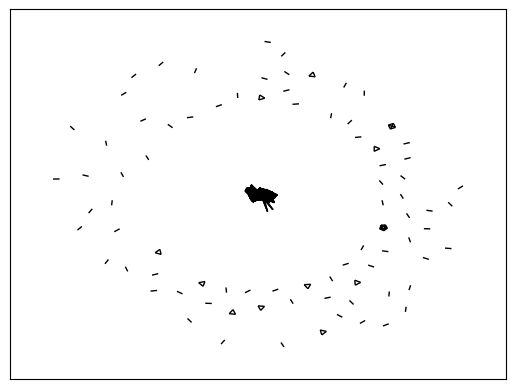

In [9]:
coupling = scripts.fca.fca.find_coupled_reactions(tmodel)
tmodel = scripts.fca.fca.collapse_coupled_reactions(tmodel, coupling)

In [35]:
print(tmodel.reactions.DMPPS.metabolites)

{<ThermoMetabolite h2mb4p_c at 0x772ea105d390>: -1, <ThermoMetabolite nadh_c at 0x772ea8f845d0>: -1, <ThermoMetabolite dmpp_c at 0x772e9a1dd390>: 1, <ThermoMetabolite h2o_c at 0x772eaa03eb50>: 1, <ThermoMetabolite nad_c at 0x772eaa09ac10>: 1, <ThermoMetabolite h_c at 0x772eb5443fd0>: -1.0}


['Parameters', 'Exchange reactions', 'Reactions', 'Biomass Composition', 'Transmembrane reactions', 'Metabolites', 'references', 'Transmembrane_reactions_reed', 'Transmembrane reactions_Orth', 'Transmembrane reactions old', 'Sheet3', 'log', 'subsystems']
*** Reading data from Reactions ***
unknown metabolite '2dhglcn[c]' created
unknown metabolite 'nadh[c]' created
unknown metabolite 'glcn[c]' created
unknown metabolite 'nad[c]' created
unknown metabolite 'nadph[c]' created
unknown metabolite 'nadp[c]' created
unknown metabolite '2dhguln[c]' created
unknown metabolite 'idon-L[c]' created
unknown metabolite '3hcinnm[c]' created
unknown metabolite 'o2[c]' created
unknown metabolite 'dhcinnm[c]' created
unknown metabolite 'h2o[c]' created
unknown metabolite '3hpppn[c]' created
unknown metabolite 'dhpppn[c]' created
unknown metabolite 'phthr[c]' created
unknown metabolite '4hthr[c]' created
unknown metabolite 'pi[c]' created
unknown metabolite '5dglcn[c]' created
unknown metabolite 'ru5p-D

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


2dhglcn_c NOTHING DONE!
nadh_c NOTHING DONE!
glcn_c NOTHING DONE!
nad_c NOTHING DONE!
nadph_c NOTHING DONE!
nadp_c NOTHING DONE!
2dhguln_c NOTHING DONE!
idon-L_c NOTHING DONE!
3hcinnm_c NOTHING DONE!
o2_c NOTHING DONE!
dhcinnm_c NOTHING DONE!
h2o_c NOTHING DONE!
3hpppn_c NOTHING DONE!
dhpppn_c NOTHING DONE!
phthr_c NOTHING DONE!
4hthr_c NOTHING DONE!
pi_c NOTHING DONE!
5dglcn_c NOTHING DONE!
ru5p-D_c NOTHING DONE!
ara5p_c NOTHING DONE!
ACP_c NOTHING DONE!
atp_c NOTHING DONE!
ttdca_c NOTHING DONE!
amp_c NOTHING DONE!
myrsACP_c NOTHING DONE!
ppi_c NOTHING DONE!
ttdcea_c NOTHING DONE!
tdeACP_c NOTHING DONE!
hdca_c NOTHING DONE!
palmACP_c NOTHING DONE!
hdcea_c NOTHING DONE!
hdeACP_c NOTHING DONE!
ocdcea_c NOTHING DONE!
octeACP_c NOTHING DONE!
dtdp4aaddg_c NOTHING DONE!
unagamu_c NOTHING DONE!
dtdp_c NOTHING DONE!
unagamuf_c NOTHING DONE!
arbt6p_c NOTHING DONE!
g6p_c NOTHING DONE!
hqn_c NOTHING DONE!
4abut_c NOTHING DONE!
akg_c NOTHING DONE!
glu-L_c NOTHING DONE!
sucsal_c NOTHING DONE!
4abu

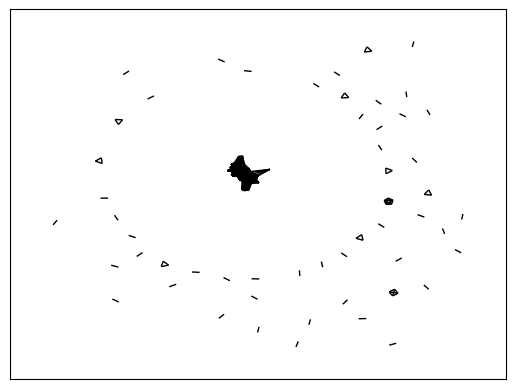

In [150]:
tmodel = scripts.gen_model.gen_model(MODEL_NAME, INPUT_MODEL, INPUT_KEGGS, INPUT_REED, INPUT_INCHI, INPUT_GAMS, "", True, True, True)
tmodel = scripts.gen_model.apply_physio_data(tmodel, CONDITIONS_TO_REGRESS[0], INPUT_EXP_DATA, INPUT_EXP_CONC, INPUT_METABOLOMICS, INPUT_GAMS, RELAX_EXP_FLUX_BOUNDS, INCLUDE_CO2, INCLUDE_O2, allow_other_excr=False, output_log="")

print(tmodel.reactions.DMPPS.metabolites)

blocked_p = scripts.reaction_utils.list_blocked_reactions(tmodel, "core", "", 1, False)
print(len(blocked_p))
tmodel.remove_reactions(blocked_p, remove_orphans=True)
scripts.metabolite_utils.remove_orphan_metabolites(tmodel)

tmodel = scripts.fca.fca.compress_model_full(tmodel)

blocked_p = scripts.reaction_utils.list_blocked_reactions(tmodel, "core", "", 1, False)
print(len(blocked_p))
tmodel.remove_reactions(blocked_p, remove_orphans=True)
scripts.metabolite_utils.remove_orphan_metabolites(tmodel)

for rxn in tmodel.reactions:
    print(rxn.id, rxn)
    reaction_balance(rxn, balance_charge=True, balance_mg=False)
tmodel.update_thermo_info(fit_unknown_dfG0=True)


In [152]:
tmodel.objective = tmodel.reactions.biomass_EX
tmodel.optimize()

,fluxes,reduced_costs
2DGLCNRx,0.000000,0.0
2DGULRx,0.000000,0.0
2DGULRy,0.000000,0.0
A5PISO,0.029479,0.0
AACPS1,0.009699,0.0
...,...,...
biomass_ce,0.701880,0.0
biomass_EX,0.701880,2.0
OROTex,0.000000,0.0
DCTA,0.261884,0.0


In [154]:
tmodel.m = None
tmodel.m.Params.TimeLimit = 1800
tmodel.objective = tmodel.reactions.biomass_EX
tmodel.add_TFBA_variables()

tmodel.m.Params.TimeLimit = 500
tmodel.m.optimize()


Set parameter TimeLimit to value 1800
Set parameter NonConvex to value 2
Set parameter TimeLimit to value 10
Set parameter TimeLimit to value 500
Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (linux64 - "Ubuntu 24.04.2 LTS")

CPU model: AMD Ryzen 7 7800X3D 8-Core Processor, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Non-default parameters:
TimeLimit  500
NonConvex  2
GURO_PAR_DUMP  1

Academic license 2731723 - for non-commercial use only - registered to l.___@student.rug.nl
Optimize a model with 4123 rows, 3336 columns and 69844 nonzeros
Model fingerprint: 0x18d75333
Model has 1 simple general constraint
  1 NORM
Variable types: 2927 continuous, 409 integer (409 binary)
Coefficient statistics:
  Matrix range     [3e-06, 3e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [3e-01, 1e+06]
  RHS range        [2e-14, 1e+05]
         Consider reformulating model or setting NumericFocus parameter
         t

In [148]:
print(len(iis[3]))

262
